In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [2]:
# Functional form of each HOD parameter

def M_function(magnitude,A,B,C,D):
    # Function for Mmin and M1
    return (A + 12) + B*(magnitude + 20) + C*(magnitude+20)**2 + D*(magnitude+20)**3 

def M0_function(magnitude, A, B):
    M0s = (A+11) + B*(magnitude+20)
    M0s[M0s <=1.0] = 1.0
    return M0s

def sigma_function(magnitude, A, B, C, D):
    return A + (B-A) / (1.+np.exp((C*(magnitude+20+D))))

def alpha_function(magnitude,A,B,C):
    return A + B ** (-magnitude - 20 + C)

In [3]:
# read the best-fitting HOD parameters

# The parameters in the file are in the order:
# Index:     0      1      2      3      4        5        6        7        8    9    10   11   12   13   14       15       16
# Parameter: A_min, B_min, C_min, D_min, A_sigma, B_sigma, C_sigma, D_sigma, A_0, B_0, A_1, B_1, C_1, D_1, A_alpha, B_alpha, C_alpha

c = 0  # cosmology number
ph = 0 # phase number

params = np.loadtxt("data/best_fits/AbacusSummit_base_c%03d_ph%03d_best_params.txt"%(c,ph))

In [4]:
print(params)

[-0.11632959 -0.57590664  0.14370854 -0.01908335  0.01832666  0.7584865
  1.10310377  0.32777872 -0.54688955 -1.67356238  1.12149736 -0.47256252
  0.09200039 -0.01141762  1.11186666  4.47394987 -4.35330987]


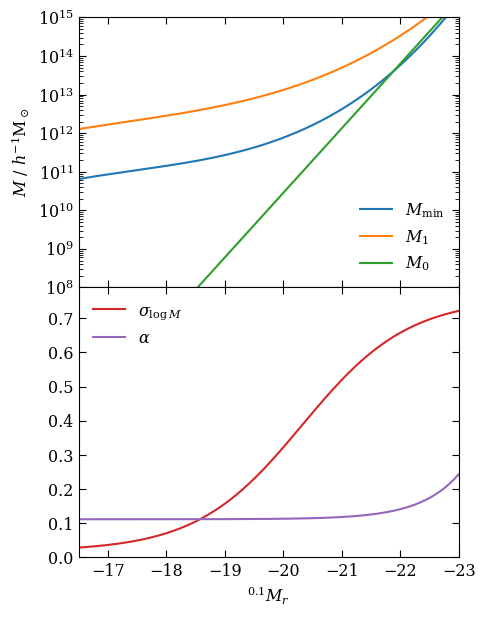

In [5]:
# set font
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# initialize subplots
f, ax = plt.subplots(2,1, figsize=(5,6)) 
plt.subplots_adjust(wspace=0, hspace=0, top = 0.98, bottom = 0.08, right = 0.9, left = 0.14)

for i in range(2):
    ax[i].tick_params(direction="in", top=True, right=True, length=5, labelsize=11.5)
    ax[i].tick_params(which="minor", direction="in", top=True, right=True, length=3, labelsize=11.5)
        
        
# plot mass parameters in the upper panel
magnitude = np.arange(-23,-16,0.01)
ax[0].plot(magnitude, 10**M_function(magnitude, *params[0:4]), c="C0", label=r"$M_\mathrm{min}$")
ax[0].plot(magnitude, 10**M_function(magnitude, *params[10:14]), c="C1", label=r"$M_1$")
ax[0].plot(magnitude, 10**M0_function(magnitude, *params[8:10]), c="C2", label=r"$M_0$")
ax[0].legend(loc="lower right", fontsize=11.5).draw_frame(False)

# plot sigma_logM and alpha in the lower panel
ax[1].plot(magnitude, sigma_function(magnitude, *params[4:8]), c="C3", label=r"$\sigma_{\log M}$")
ax[1].plot(magnitude, alpha_function(magnitude, *params[14:])-1, c="C4", label=r"$\alpha$")
ax[1].legend(loc="upper left", fontsize=11.5).draw_frame(False)


# set axis limits and labels
ax[0].set_yscale("log")
ax[0].set_xticklabels([])
ax[0].set_ylim(1e8,1e15)
ax[1].set_ylim(0, 0.79)
for i in range(2):
    ax[i].set_xlim(-16.5, -23)
    
ax[1].set_xlabel(r"${}^{0.1}M_r$", fontsize=11.5)
ax[0].set_ylabel(r"$M \ / \ h^{-1}\mathrm{M}_\odot$", fontsize=11.5)

# save the figure as a pdf
plt.savefig("pdf/Figure_1.pdf", dpi=300)